<a href="https://www.kaggle.com/code/aruneembhowmick/keras-neural-networks-for-exercise-classification?scriptVersionId=200680906" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [89]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/exercise-detection-dataset/exercise_angles.csv


In [90]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [91]:
exercise_angles_dataset = pd.read_csv('/kaggle/input/exercise-detection-dataset/exercise_angles.csv')
exercise_angles_dataset

Side  Shoulder_Angle  Elbow_Angle   Hip_Angle  Knee_Angle  Ankle_Angle  \
0      left       10.639208   174.466813  174.785143  179.848140   179.419276   
1      left       10.590342   174.428706  174.765042  179.775215   179.386147   
2      left       10.546746   174.489431  174.785790  179.660017   179.333710   
3      left       10.487682   174.614913  174.759542  179.614223   179.313926   
4      left       10.412107   174.758503  174.737721  179.570564   179.298805   
...     ...             ...          ...         ...         ...          ...   
31028  left       12.723974    81.226330  149.356832  154.358415   178.103121   
31029  left        9.080920    82.486551  148.100509  152.680540   178.625318   
31030  left        4.118076    85.164707  148.329461  152.458288   178.605852   
31031  left        0.558065    89.419330  146.742440  149.930600   179.604753   
31032  left        3.610121    89.992518  141.439189  144.633832   179.616705   

       Shoulder_Ground_Angle  Elbow_Ground_Angle  Hip_Ground_Angle  \
0                       90.0                90.0              90.0   
1                       90.0                90.0              90.0   
2                       90.0                90.0              90.0   
3                       90.0                90.0              90.0   
4                       90.0                90.0              90.0   
...                      ...                 ...               ...   
31028                   90.0                90.0              90.0   
31029                   90.0                90.0              90.0   
31030                   90.0                90.0              90.0   
31031                   90.0                90.0              90.0   
31032                   90.0                90.0              90.0   

       Knee_Ground_Angle  Ankle_Ground_Angle           Label  
0                   90.0                90.0   Jumping Jacks  
1                   90.0                90.0   Jumping Jacks  
2                   90.0                90.0   Jumping Jacks  
3                   90.0                90.0   Jumping Jacks  
4                   90.0                90.0   Jumping Jacks  
...                  ...                 ...             ...  
31028               90.0               -90.0  Russian twists  
31029               90.0               -90.0  Russian twists  
31030               90.0               -90.0  Russian twists  
31031               90.0               -90.0  Russian twists  
31032               90.0               -90.0  Russian twists  

[31033 rows x 12 columns]

In [92]:
features = []

for column in exercise_angles_dataset.columns:
    features.append(column)

targets = features.pop()

In [93]:
del features[0]
features

['Shoulder_Angle',
 'Elbow_Angle',
 'Hip_Angle',
 'Knee_Angle',
 'Ankle_Angle',
 'Shoulder_Ground_Angle',
 'Elbow_Ground_Angle',
 'Hip_Ground_Angle',
 'Knee_Ground_Angle',
 'Ankle_Ground_Angle']

In [94]:
targets

'Label'

In [95]:
label_encoder = LabelEncoder()
exercise_angles_dataset[targets] = label_encoder.fit_transform(exercise_angles_dataset[targets])

exercise_predictors = exercise_angles_dataset[features].values
exercise_categories = exercise_angles_dataset[targets].values
exercise_predictors_train, exercise_predictors_test, exercise_categories_train, exercise_categories_test = train_test_split(exercise_predictors, exercise_categories, test_size = 0.2, random_state = 42)

In [96]:
model = keras.Sequential([
    layers.Input(shape = (exercise_predictors_train.shape[1],)),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(len(np.unique(exercise_categories)), activation='softmax')
])
 
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

history = model.fit(exercise_predictors_train, exercise_categories_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
621/621 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6532 - loss: 3.7818 - val_accuracy: 0.7662 - val_loss: 0.8595
Epoch 2/50
621/621 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7807 - loss: 0.7686 - val_accuracy: 0.7386 - val_loss: 0.8649
Epoch 3/50
621/621 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7925 - loss: 0.7042 - val_accuracy: 0.7783 - val_loss: 0.7006
Epoch 4/50
621/621 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8114 - loss: 0.6122 - val_accuracy: 0.8147 - val_loss: 0.5460
Epoch 5/50
621/621 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8221 - loss: 0.5515 - val_accuracy: 0.8629 - val_loss: 0.4459
Epoch 6/50
621/621 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8500 - loss: 0.4790 - val_accuracy: 0.8329 - val_loss: 0.4541
Epoch 7/50
621/621 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8490 - loss: 0.4520 - val_accuracy: 0.8641 - val_loss: 0.5027
Epoch 8/50
621/621 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8381 - loss: 0.5056 - val_accuracy: 0.

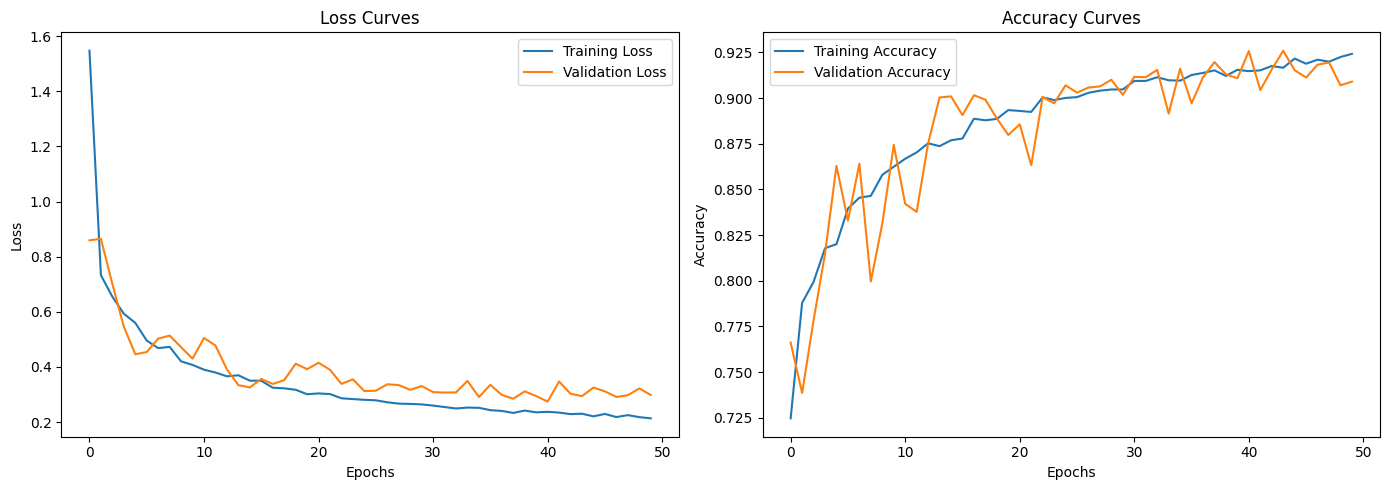

In [97]:
plt.figure(figsize = (14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [98]:
loss, accuracy = model.evaluate(exercise_predictors_test, exercise_categories_test)
print(f'Test Accuracy: {accuracy:.2f}')

194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9266 - loss: 0.2400
Test Accuracy: 0.92


194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


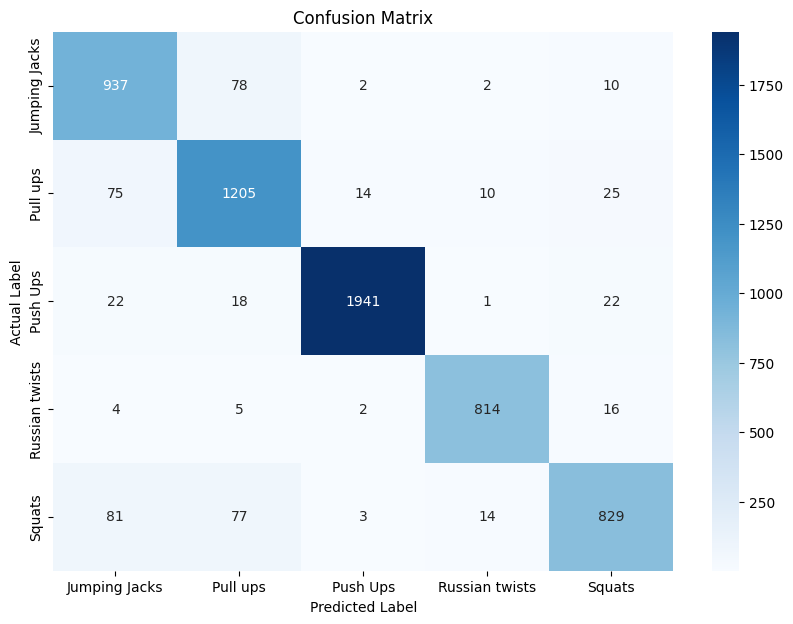

In [99]:
predictions = model.predict(exercise_predictors_test)
exercise_categories_predicted = np.argmax(predictions, axis=1)

cm = confusion_matrix(exercise_categories_test, exercise_categories_predicted)

plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels = label_encoder.classes_, 
            yticklabels = label_encoder.classes_)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

In [100]:
print("Classification Report:\n", classification_report(exercise_categories_test, exercise_categories_predicted, target_names = label_encoder.classes_))

Classification Report:
                 precision    recall  f1-score   support

 Jumping Jacks       0.84      0.91      0.87      1029
      Pull ups       0.87      0.91      0.89      1329
      Push Ups       0.99      0.97      0.98      2004
Russian twists       0.97      0.97      0.97       841
        Squats       0.92      0.83      0.87      1004

      accuracy                           0.92      6207
     macro avg       0.92      0.92      0.92      6207
  weighted avg       0.92      0.92      0.92      6207

